In [108]:
from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from scipy.stats import skew
plt.style.use('ggplot')


## 读入数据

In [60]:

def Read_Data():
    data = pd.read_csv('D:\大四材料\实习\梅钢\lz_eige_data\lz_eige_data.csv' , nrows = 10000000, header = None) # 获取日期数据
    return data
## 数据共 27736166 行

In [61]:
def Rename_Columns(data):
    ## 重命名索引
     data.columns=['id','dev_no','dev_name','point_no','unit_no','ts','temperature','acceleration_peak_x','acceleration_peak_y','acceleration_peak_z','acceleration_rms_x','acceleration_rms_y','acceleration_rms_z','speed_peak_x','speed_peak_y','speed_peak_z','speed_rms_x','speed_rms_y','speed_rms_z','envelop_energy']


In [62]:
data = Read_Data()
Rename_Columns(data)

In [63]:
def Data_Accuracy(data):
    ### 无效数据
    invalid_ratio = np.mean(data.isna())
    print("无效数据率:\n",invalid_ratio)
    O_invalid_ratio = mean(invalid_ratio)
    print("整体数据无效率: ",O_invalid_ratio)
    ### 重复数据
    duplicate_ratio = np.sum(data.duplicated())
    print("重复数据量:\n",duplicate_ratio)


In [64]:
print("读入完成。。。")
data.sample(10)

读入完成。。。


,id,dev_no,dev_name,point_no,unit_no,ts,temperature,acceleration_peak_x,acceleration_peak_y,acceleration_peak_z,acceleration_rms_x,acceleration_rms_y,acceleration_rms_z,speed_peak_x,speed_peak_y,speed_peak_z,speed_rms_x,speed_rms_y,speed_rms_z,envelop_energy
3245974,10920290,451145E00,2号平整机支撑辊下辊电机,50294D205131024,C112,1.675759e+12,NaN,209.163455,NaN,NaN,14.156936,NaN,NaN,92.791811,NaN,NaN,12.708412,NaN,NaN,NaN
8263840,15938156,452235M06,平整机支撑辊减速箱1#,50294D205090012,C208,1.676111e+12,NaN,2.624201,NaN,NaN,1.023392,NaN,NaN,4.564313,NaN,NaN,1.058158,NaN,NaN,NaN
1061949,8736265,450137E01,5＃张力辊1#电机,392ce4feff8d79e0-Z,C102,1.675389e+12,NaN,2.750000,3.77,7.01,0.787200,0.7896,1.3477,1.580900,1.3668,1.94,0.466500,0.4814,0.6582,8.96
1885457,9559773,451151E03,1#卷取机电机,50294D205103042,C112,1.675643e+12,28.599829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2947475,10621791,451145E00,1号平整机支撑辊下辊电机,50294D205108024,C112,1.675738e+12,NaN,18.039896,NaN,NaN,1.524922,NaN,NaN,5.459786,NaN,NaN,1.218740,NaN,NaN,NaN
4687708,12362024,451215E01,入口活套主电机,50294D205150022,C117,1.675861e+12,NaN,1.356570,NaN,NaN,0.164071,NaN,NaN,1.289564,NaN,NaN,0.457203,NaN,NaN,NaN
9331065,17005381,451215M01,入口活套主电机减速箱,50294D205150011,C117,1.676185e+12,NaN,0.795306,NaN,NaN,0.138371,NaN,NaN,0.203006,NaN,NaN,0.048385,NaN,NaN,NaN
6516320,14190636,452213E01,2#张力辊1#辊电机,194fe2feff8d79e0-S,C208,1.675989e+12,19.062500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2231297,9905613,450210E01,3#机架主传动电机,50294D205171034,C102,1.675688e+12,NaN,8.131825,NaN,NaN,0.650284,NaN,NaN,3.263880,NaN,NaN,1.020993,NaN,NaN,NaN
9376818,17051134,450119M02,拉矫机主传动1#齿轮箱,50294D205110023,C102,1.676188e+12,NaN,0.682807,NaN,NaN,0.130278,NaN,NaN,0.108691,NaN,NaN,0.026647,NaN,NaN,NaN


## 时间戳转换

In [65]:
# 去除所有ts是NAN的行
print(data.shape[0])
data.dropna(axis=0,subset=['ts'],inplace=True)
print(data.shape[0])

10000000
9999196


In [66]:
## 时间戳转为时间序列
print( data['ts'].dtype)
data['ts'] = data['ts'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000).strftime('%Y-%m-%d %H:%M:%S'))
print(data['ts'].dtype)
# data['ts'] = pd.to_datetime(data['ts'])


float64
object


In [67]:
data['ts'] = pd.to_datetime(data['ts'])
data['ts'].sample(10)

7674242   2023-02-11 06:53:30
7631449   2023-02-11 06:03:47
6445929   2023-02-10 07:07:49
1059471   2023-02-03 09:41:20
2088234   2023-02-06 18:07:54
2170788   2023-02-06 19:44:25
5222681   2023-02-09 07:15:35
291151    2023-01-31 06:38:21
8934742   2023-02-12 07:15:34
5601113   2023-02-09 14:38:34
Name: ts, dtype: datetime64[ns]

In [68]:
## 缺失值检查
## 一定没有ts缺失，因为缺失已经被删了
Data_Accuracy(data)

D:\Anaconda\anaconda\envs\data\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


无效数据率:
 id                     0.000000
dev_no                 0.000000
dev_name               0.000000
point_no               0.000000
unit_no                0.000000
ts                     0.000000
temperature            0.663111
acceleration_peak_x    0.336889
acceleration_peak_y    0.869157
acceleration_peak_z    0.869157
acceleration_rms_x     0.336889
acceleration_rms_y     0.869157
acceleration_rms_z     0.869157
speed_peak_x           0.336889
speed_peak_y           0.869157
speed_peak_z           0.869157
speed_rms_x            0.336889
speed_rms_y            0.869157
speed_rms_z            0.869157
envelop_energy         0.869157
dtype: float64
整体数据无效率:  0.491653988980714
重复数据量:
 0


In [69]:
data.tail(10)

,id,dev_no,dev_name,point_no,unit_no,ts,temperature,acceleration_peak_x,acceleration_peak_y,acceleration_peak_z,acceleration_rms_x,acceleration_rms_y,acceleration_rms_z,speed_peak_x,speed_peak_y,speed_peak_z,speed_rms_x,speed_rms_y,speed_rms_z,envelop_energy
9999990,17674306,450209M13,2机架大齿轮箱,50294D205171014,C102,2023-02-13 03:51:04,NaN,6.437369,NaN,NaN,0.483647,NaN,NaN,4.354996,NaN,NaN,1.348467,NaN,NaN,NaN
9999991,17674307,450209M13,2机架大齿轮箱,50294D205171021,C102,2023-02-13 03:51:04,NaN,6.459533,NaN,NaN,0.521980,NaN,NaN,3.797517,NaN,NaN,1.055353,NaN,NaN,NaN
9999992,17674308,450209M13,2机架大齿轮箱,50294D205171022,C102,2023-02-13 03:51:04,NaN,3.585156,NaN,NaN,0.292849,NaN,NaN,3.156592,NaN,NaN,0.904588,NaN,NaN,NaN
9999993,17674309,450209M13,2机架大齿轮箱,50294D205171024,C102,2023-02-13 03:51:04,NaN,3.243976,NaN,NaN,0.277018,NaN,NaN,2.760747,NaN,NaN,0.995047,NaN,NaN,NaN
9999994,17674310,450210E01,3#机架主传动电机,50294D205171031,C102,2023-02-13 03:51:04,NaN,6.245926,NaN,NaN,0.485028,NaN,NaN,4.093787,NaN,NaN,1.619844,NaN,NaN,NaN
9999995,17674311,450210E01,3#机架主传动电机,50294D205171032,C102,2023-02-13 03:51:04,NaN,8.174423,NaN,NaN,0.606266,NaN,NaN,5.548491,NaN,NaN,2.218695,NaN,NaN,NaN
9999996,17674312,450210E01,3#机架主传动电机,50294D205171033,C102,2023-02-13 03:51:04,NaN,7.044190,NaN,NaN,0.593633,NaN,NaN,2.732698,NaN,NaN,0.857606,NaN,NaN,NaN
9999997,17674313,450210E01,3#机架主传动电机,50294D205171034,C102,2023-02-13 03:51:04,NaN,8.844166,NaN,NaN,0.615582,NaN,NaN,3.589953,NaN,NaN,1.093219,NaN,NaN,NaN
9999998,17674314,450209M13,2机架大齿轮箱,50294D205171011,C102,2023-02-13 03:51:04,NaN,9.195675,NaN,NaN,0.700421,NaN,NaN,6.898361,NaN,NaN,2.700441,NaN,NaN,NaN
9999999,17674315,450209M13,2机架大齿轮箱,50294D205171012,C102,2023-02-13 03:51:04,NaN,6.883454,NaN,NaN,0.521546,NaN,NaN,4.008237,NaN,NaN,1.597405,NaN,NaN,NaN


In [70]:
### 数据重复值检查
data[data.duplicated()]

,id,dev_no,dev_name,point_no,unit_no,ts,temperature,acceleration_peak_x,acceleration_peak_y,acceleration_peak_z,acceleration_rms_x,acceleration_rms_y,acceleration_rms_z,speed_peak_x,speed_peak_y,speed_peak_z,speed_rms_x,speed_rms_y,speed_rms_z,envelop_energy


In [71]:
data.duplicated().sum()

0

In [176]:
# T = data.temperature.notnull().index
# T = np.nonzero(data.temperature)
T = set(data[data['temperature'].notnull()==True].index)
X = set(data[data['acceleration_peak_x'].notnull()==True].index)
YZ = set(data[data['acceleration_peak_y'].notnull()==True].index)
# print(len(T),len(X),len(ZY))
print(len(T))

3368616


## 绘集合图

<Axes: >

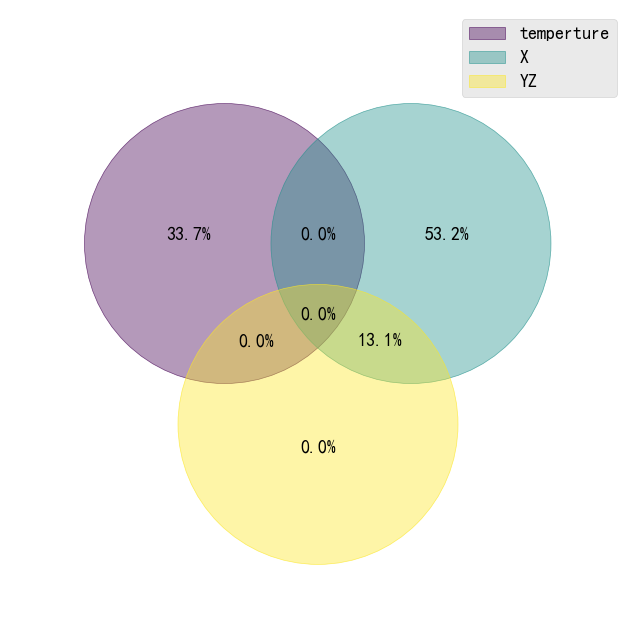

In [177]:
from venn import venn

musicians = {
    "temperture": T,
    "X": X,
    "YZ": YZ
}
venn(musicians, fmt="{percentage:.1f}%")

## 数据分组

In [74]:
# 按point_no分组
point_no_groups = data.groupby(['point_no'])
print("一共包含  ",len(point_no_groups),"  point_no_groups")

一共包含   988   point_no_groups


In [75]:
#  按 dev_no 分组
dev_no_groups = data.groupby(['dev_no'])
print("一共包含  ",len(dev_no_groups),"  dev_no_groups")

一共包含   153   dev_no_groups


In [76]:
#  按dev_no + point_no分组
dev_point_no_groups = data.groupby(['dev_no','point_no'])
print("一共包含  ",len(dev_point_no_groups),"  dev_point_no_groups")

##说明 point_no 可以唯一确定一条数据

一共包含   988   dev_point_no_groups


# 以temperature为例

In [77]:
## 提取temperature、X
Temp = data[{'point_no','ts','temperature'}]

C:\Users\JDD\AppData\Local\Temp\ipykernel_16604\3766927364.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Temp = data[{'point_no','ts','temperature'}]


In [78]:
Temp = Temp.dropna() ## 去除NAN值
Temp_point_no_groups = Temp.groupby(['point_no'])
print("一共包含  ",len(Temp_point_no_groups),"  Temp_point_no_groups")

一共包含   494   Temp_point_no_groups


## 分析数据平均值、方差

In [79]:
## 每组平均值
Temp_point_no_groups_m = Temp_point_no_groups.mean()
print(Temp_point_no_groups_m)

                    temperature
point_no                       
001de4feff8d79e0-S    11.550120
01c476feff958edc-S    14.458903
021de4feff8d79e0-S    14.957307
02b6cffeff8d79e0-S    18.350017
0338e4feff8d79e0-S    12.297060
...                         ...
ff19e4feff8d79e0-S    27.237340
ff48e2feff8d79e0-S    20.819036
ff5ae2feff8d79e0-S    24.999747
ffbdcffeff8d79e0-S    19.395167
ffc476feff958edc-S    24.568959

[494 rows x 1 columns]


C:\Users\JDD\AppData\Local\Temp\ipykernel_16604\1598978151.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Temp_point_no_groups_m = Temp_point_no_groups.mean()


In [80]:
## 每组方差
Temp_point_no_groups_v = Temp_point_no_groups.var()
Temp_point_no_groups_v

C:\Users\JDD\AppData\Local\Temp\ipykernel_16604\4160799696.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Temp_point_no_groups_v = Temp_point_no_groups.var()


,temperature
point_no,
001de4feff8d79e0-S,3.724554
01c476feff958edc-S,2.758735
021de4feff8d79e0-S,10.183343
02b6cffeff8d79e0-S,1.672623
0338e4feff8d79e0-S,6.588946
...,...
ff19e4feff8d79e0-S,14.337256
ff48e2feff8d79e0-S,0.520073
ff5ae2feff8d79e0-S,13.860226


In [81]:
group = Temp_point_no_groups.get_group("50294D205151051")
group = group.sort_values(by='ts')
group.point_no.values[0]

'50294D205151051'

In [82]:
# 数据传参，异常分析
# 重新设置索引，转为numpy格式
GroupTemperture = group.temperature.reset_index(drop = True)
GroupTS = group.ts.reset_index(drop = True)
type(GroupTemperture)

pandas.core.series.Series

In [83]:
GroupTemperture

0        32.531822
1        32.628334
2        33.188683
3        32.848919
4        32.862713
           ...    
17163    39.225616
17164    39.225616
17165    39.225616
17166    39.225616
17167    39.225616
Name: temperature, Length: 17168, dtype: float64

## 1、滑动窗口的3-sigma

In [94]:
def sliding_3_sigma(win, t, a, ts):
    """
    滑动窗口的3-sigma
    :param win: windows，窗口大小
    :param t: 3-sigma ,t = 3
    :param a: 数值序列 pandas.core.series.Series
    :param ts: 时间序列 pandas.core.series.Series
    :return: x,y 异常点位置与数值
    """
    # 定义窗口大小和阈值
    window_size = win
    threshold = t

    # 检测异常值和突变
    anomalies = []
    for i in range(0,len(a) - window_size + 1):
        window = a[i:i+window_size]
        mean_w = np.mean(window)
        std_w = np.std(window)
        for j in range(window_size):
            if abs(window[j+i] - mean_w) > threshold * std_w:
                anomalies.append(i+j)
                # break

    # 显示异常点
    x = ts[anomalies]
    y = a[anomalies]

    # 可视化结果
    plt.rcParams['font.sans-serif'] = 'Simhei' # 显示中文
    plt.figure(figsize=(16,10),dpi=150)
    plt.scatter(x, y ,edgecolors='b')
    plt.plot(ts,a)
    # plt.xticks(ts.values[::1000]) # 坐标轴每隔1000取一个
    plt.gcf().autofmt_xdate() # 自适应X坐标
    plt.title("滑动窗口的3-sigma")
    plt.xlabel('时间')
    plt.ylabel('数值')
    plt.show()

    return x,y


## 2、滑动窗口的箱线图

In [95]:
def sliding_boxplot(win, t, a, ts):
    """
    滑动窗口的箱线图
    :param win: windows，窗口大小
    :param t: 阈值大小，阈值乘以IQR得到下边界(lower_bound)和上边界(upper_bound)
    :param a: 数值序列 pandas.core.series.Series
    :param ts: 时间序列 pandas.core.series.Series
    :return: x,y 异常点位置与数值
    """
    # 定义窗口大小和阈值
    window_size = win
    threshold = t

    # 检测异常值和突变
    anomalies = []
    for i in range(0, len(a) - window_size + 1):
        window = a[i:i + window_size]
        q1, q3 = np.percentile(window, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        for j in range(window_size):
            if window[j+i] < lower_bound or window[j+i] > upper_bound:
                anomalies.append(i + j)
                # break

    # 显示异常点
    x = ts[anomalies]
    y = a[anomalies]

    # 可视化结果
    plt.rcParams['font.sans-serif'] = 'Simhei'  # 显示中文
    plt.figure(figsize=(16, 10), dpi=150)
    plt.scatter(x, y, edgecolors='b')
    plt.plot(ts, a)
    plt.gcf().autofmt_xdate()  # 自适应X坐标
    plt.title("滑动窗口的箱线图")
    plt.xlabel('时间')
    plt.ylabel('数值')
    plt.show()

    return x,y

# 使用滑动窗口来检测异常值和突变。对于每个窗口，我们首先计算第一四分位数(q1)和第三四分位数(q3)，
# 然后计算IQR(q3 - q1)，最后将阈值乘以IQR得到下边界(lower_bound)和上边界(upper_bound)。
# 如果窗口中的任何一个值小于lower_bound或大于upper_bound，则认为该窗口存在异常点。
# 在这里，我们使用np.quantile函数计算四分位数，因为它比传统的np.percentile函数更快。

## 3、滑动窗口 3_sigma 【数据修复】

In [104]:
def sliding_3_sigma_window_outlier_detection(win, t, a, ts, fill_threshold=True):
    """
    滑动窗口 3_sigma 数据修复
    :param win: windows，窗口大小
    :param t: 阈值大小，阈值乘以IQR得到下边界(lower_bound)和上边界(upper_bound)
    :param a: 数值序列 pandas.core.series.Series
    :param ts: 时间序列 pandas.core.series.Series
    :param fill_threshold:
    :return:
    """
    # 定义窗口大小和阈值
    window_size = win
    threshold = t
    # 检测异常值和突变
    anomalies = []
    for i in range(0, len(a) - window_size + 1):
        window = a[i:i+window_size]
        mean_w = np.mean(window)
        std_w = np.std(window)
        for j in range(window_size):
            if abs(window[j+i] - mean_w) > threshold * std_w:
                anomalies.append(i+j)
                # if fill_threshold: # 会改变原始数据
                #     a[i+j] = mean_w + threshold * std_w if window[j+i] > mean_w else mean_w - threshold * std_w

    # 可视化结果
    fig, ax = plt.subplots(figsize=(16, 10), dpi=150)
    # ax.scatter(ts[anomalies], a[anomalies], edgecolors='b', label='异常点')
    ax.plot(ts, a, label='原始数据')

    # 填充阈值修复后的数据
    if fill_threshold:
        fixed_a = a.copy()
        for i in range(len(a) - window_size + 1):
            window = a[i:i+window_size]
            mean_w = np.mean(window)
            std_w = np.std(window)
            for j in range(window_size):
                if abs(window[j+i] - mean_w) > threshold * std_w:
                    fixed_a[i+j] = mean_w + threshold * std_w if window[j+i] > mean_w else mean_w - threshold * std_w
        ax.plot(ts, fixed_a, label='修复后数据')

    plt.title("滑动窗口 3_sigma+数据修复")
    ax.set_xlabel('时间')
    ax.set_ylabel('数值')
    ax.legend()
    fig.autofmt_xdate() # 自适应X坐标
    plt.show()

## 4、滑动窗口 箱线图 【数据修复】

In [105]:
def sliding_boxplot_window_outlier_detection(win, t, a, ts, fill_threshold=True):
    """
    滑动窗口 箱线图 数据修复
    :param win: windows，窗口大小
    :param t: 阈值大小，阈值乘以IQR得到下边界(lower_bound)和上边界(upper_bound)
    :param a: 数值序列 pandas.core.series.Series
    :param ts: 时间序列 pandas.core.series.Series
    :param fill_threshold:
    :return:
    """
    # 定义窗口大小和阈值
    window_size = win
    threshold = t
    # 检测异常值和突变
    anomalies = []
    for i in range(0, len(a) - window_size + 1):
        window = a[i:i+window_size]
        q1, q3 = np.percentile(window, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        for j in range(window_size):
            if window[j+i] < lower_bound or window[j+i] > upper_bound:
                anomalies.append(i+j)
                # if fill_threshold:
                #     a[i+j] = lower_bound if window[j+i] < lower_bound else upper_bound

    # 可视化结果
    fig, ax = plt.subplots(figsize=(16, 10), dpi=150)
    # ax.scatter(ts[anomalies], a[anomalies], edgecolors='b', label='异常点')
    ax.plot(ts, a, label='原始数据')

    # 填充阈值修复后的数据
    if fill_threshold:
        fixed_a = a.copy()
        for i in range(len(a) - window_size + 1):
            window = a[i:i+window_size]
            q1, q3 = np.percentile(window, [25, 75])
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            for j in range(window_size):
                if window[j+i] < lower_bound or window[j+i] > upper_bound:
                    fixed_a[i+j] = lower_bound if window[j+i] < lower_bound else upper_bound
        ax.plot(ts, fixed_a, label='修复后数据')

    plt.title("滑动窗口 箱线图+数据修复")
    ax.set_xlabel('时间')
    ax.set_ylabel('数值')
    ax.legend()
    fig.autofmt_xdate() # 自适应X坐标
    plt.show()


## 5、滑动窗口 偏度+3_sigma 【数据修复】

In [166]:
def sliding_window_skew_3_sigma_outlier_detection(win, t, a, ts, fill_threshold=True):
    """
    滑动窗口 偏度+3_sigma 数据修复
    :param win: windows，窗口大小
    :param t: 阈值大小，阈值乘以IQR得到下边界(lower_bound)和上边界(upper_bound)
    :param a: 数值序列 pandas.core.series.Series
    :param ts: 时间序列 pandas.core.series.Series
    :param fill_threshold:
    :return:
    """
    # 定义窗口大小和阈值
    window_size = win
    threshold = t

    # 检测异常值和突变
    anomalies = []
    for i in range(0, len(a) - window_size + 1):
        window = a[i:i+window_size]
        mean_w = np.mean(window)
        std_w = np.std(window)
        skewness_w = skew(window)  # 计算窗口偏度
        lower_bound = mean_w - threshold * std_w  # 计算下边界
        upper_bound = mean_w + threshold * std_w  # 计算上边界

        for j in range(window_size):
            if (window[j+i] < lower_bound or window[j+i] > upper_bound) or abs(skewness_w) > 1.7995:  # 如果超出边界或偏度绝对值大于1
                anomalies.append(i+j)
                # if fill_threshold:
                #     a[i+j] = mean_w + threshold * std_w if window[j+i] > mean_w else mean_w - threshold * std_w

    # 可视化结果
    fig, ax = plt.subplots(figsize=(16, 10), dpi=150)
    # ax.scatter(ts[anomalies], a[anomalies], edgecolors='b', label='异常点')
    ax.plot(ts, a, label='原始数据')

    # 填充阈值修复后的数据
    if fill_threshold:
        fixed_a = a.copy()
        for i in range(len(a) - window_size + 1):
            window = a[i:i+window_size]
            mean_w = np.mean(window)
            std_w = np.std(window)
            skewness_w = skew(window)  # 计算窗口偏度
            for j in range(window_size):
                if abs(window[j+i] - mean_w) > threshold * std_w  or abs(skewness_w) > 1.7995:
                    fixed_a[i+j] = mean_w + threshold * std_w if window[j+i] > mean_w else mean_w - threshold * std_w
        ax.plot(ts, fixed_a, label='修复后数据')

    plt.title("滑动窗口 偏度+3_sigma 数据修复")
    ax.set_xlabel('时间')
    ax.set_ylabel('数值')
    ax.legend()
    fig.autofmt_xdate() # 自适应X坐标
    plt.show()


## 6、滑动窗口 偏度+箱线图【数据修复】

In [140]:
def sliding_window_skew_boxplot_outlier_detection(win, t, a, ts, fill_threshold=True):
    """
    滑动窗口 偏度+箱线图 数据修复
    :param win: windows，窗口大小
    :param t: 阈值大小，阈值乘以IQR得到下边界(lower_bound)和上边界(upper_bound)
    :param a: 数值序列 pandas.core.series.Series
    :param ts: 时间序列 pandas.core.series.Series
    :param fill_threshold: 是否对异常值进行修复
    :return:
    """
    window_size = win
    threshold = t

    # 检测异常值和突变
    anomalies = []
    for i in range(0, len(a) - window_size + 1):
        window = a[i:i + window_size]
        mean_w = np.mean(window)
        std_w = np.std(window)
        skewness = ((window - mean_w) ** 3).sum() / (len(window) * std_w ** 3)
        Q1 = np.percentile(window, 25)
        Q3 = np.percentile(window, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        for j in range(window_size):
            if window[j+i] < lower_bound or window[j+i] > upper_bound or abs(skewness) > 2:
                anomalies.append(i+j)
                # if fill_threshold:
                #     a[i+j] = mean_w + threshold * std_w if window[j+i] > mean_w else mean_w - threshold * std_w

    # 可视化结果
    fig, ax = plt.subplots(figsize=(16, 10), dpi=150)
    # ax.scatter(ts[anomalies], a[anomalies], edgecolors='b', label='异常点')
    ax.plot(ts, a, label='原始数据')

    # 填充阈值修复后的数据
    if fill_threshold:
        fixed_a = a.copy()
        for i in range(len(a) - window_size + 1):
            window = a[i:i+window_size]
            mean_w = np.mean(window)
            std_w = np.std(window)
            skewness = ((window - mean_w) ** 3).sum() / (len(window) * std_w ** 3)
            Q1 = np.percentile(window, 25)
            Q3 = np.percentile(window, 75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            for j in range(window_size):
                if window[j+i] < lower_bound or window[j+i] > upper_bound or abs(skewness) > 2:
                    fixed_a[i+j] = lower_bound if window[j+i] < lower_bound else upper_bound
                    # fixed_a[i+j] = mean_w + threshold * std_w if window[j+i] > mean_w else mean_w - threshold * std_w
        ax.plot(ts, fixed_a, label='修复后数据')

    plt.title("滑动窗口 偏度+箱线图 数据修复")
    ax.set_xlabel('时间')
    ax.set_ylabel('数值')
    ax.legend()
    fig.autofmt_xdate() # 自适应X坐标
    plt.show()


## 测试

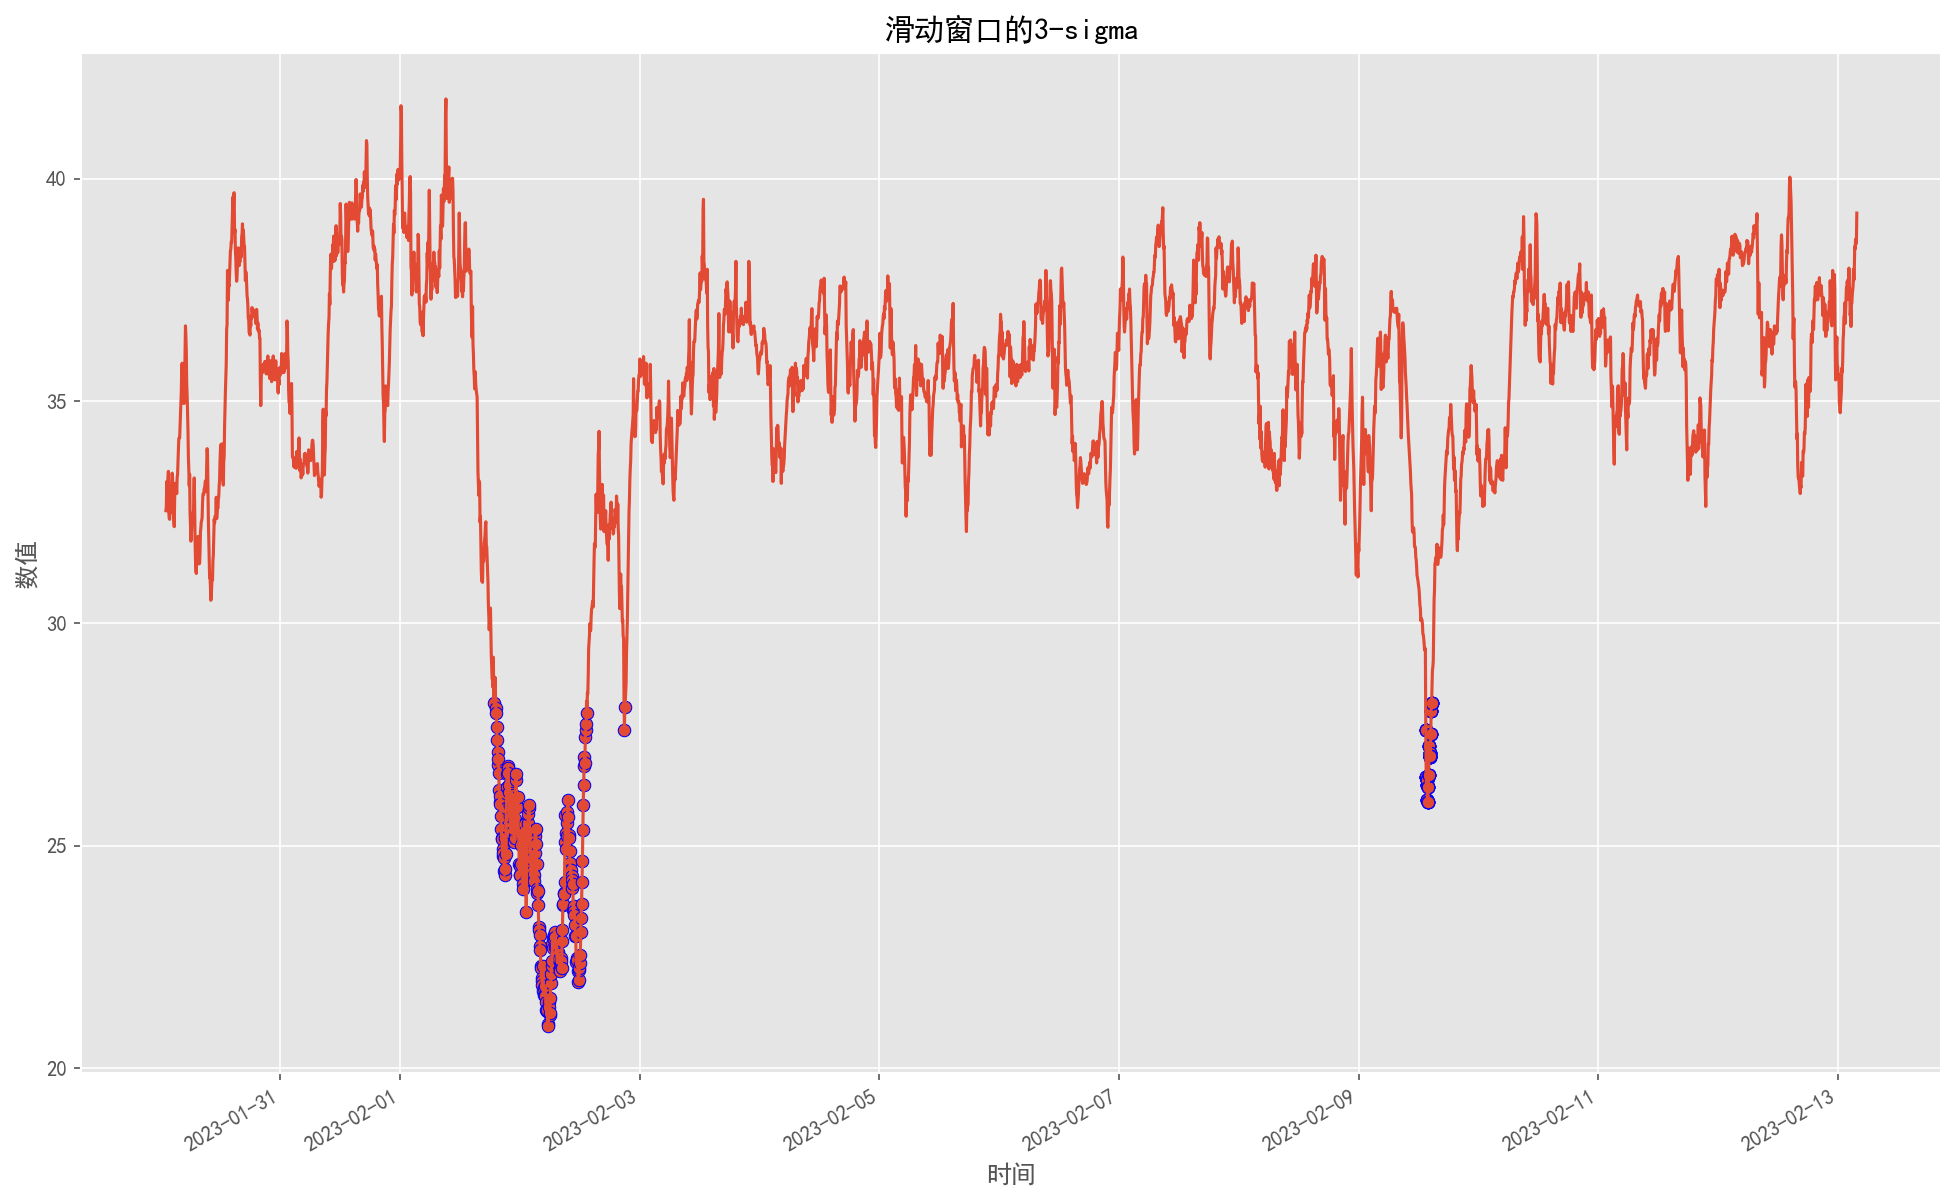

(788    2023-02-01 18:44:37
 793    2023-02-01 19:09:36
 794    2023-02-01 19:14:36
 795    2023-02-01 19:19:37
 796    2023-02-01 19:24:36
                ...        
 8987   2023-02-09 14:35:36
 8988   2023-02-09 14:35:36
 8989   2023-02-09 14:35:36
 8990   2023-02-09 14:35:36
 8991   2023-02-09 14:35:36
 Name: ts, Length: 342, dtype: datetime64[ns],
 788     28.210846
 793     28.103565
 794     27.982862
 795     27.661039
 796     27.366055
           ...    
 8987    28.197445
 8988    28.197445
 8989    28.197445
 8990    28.197445
 8991    28.197445
 Name: temperature, Length: 342, dtype: float64)

In [98]:
## 测试
sliding_3_sigma(len(GroupTemperture),3,GroupTemperture,GroupTS)
# sliding_boxplot(len(GroupTemperture),3,GroupTemperture,GroupTS)

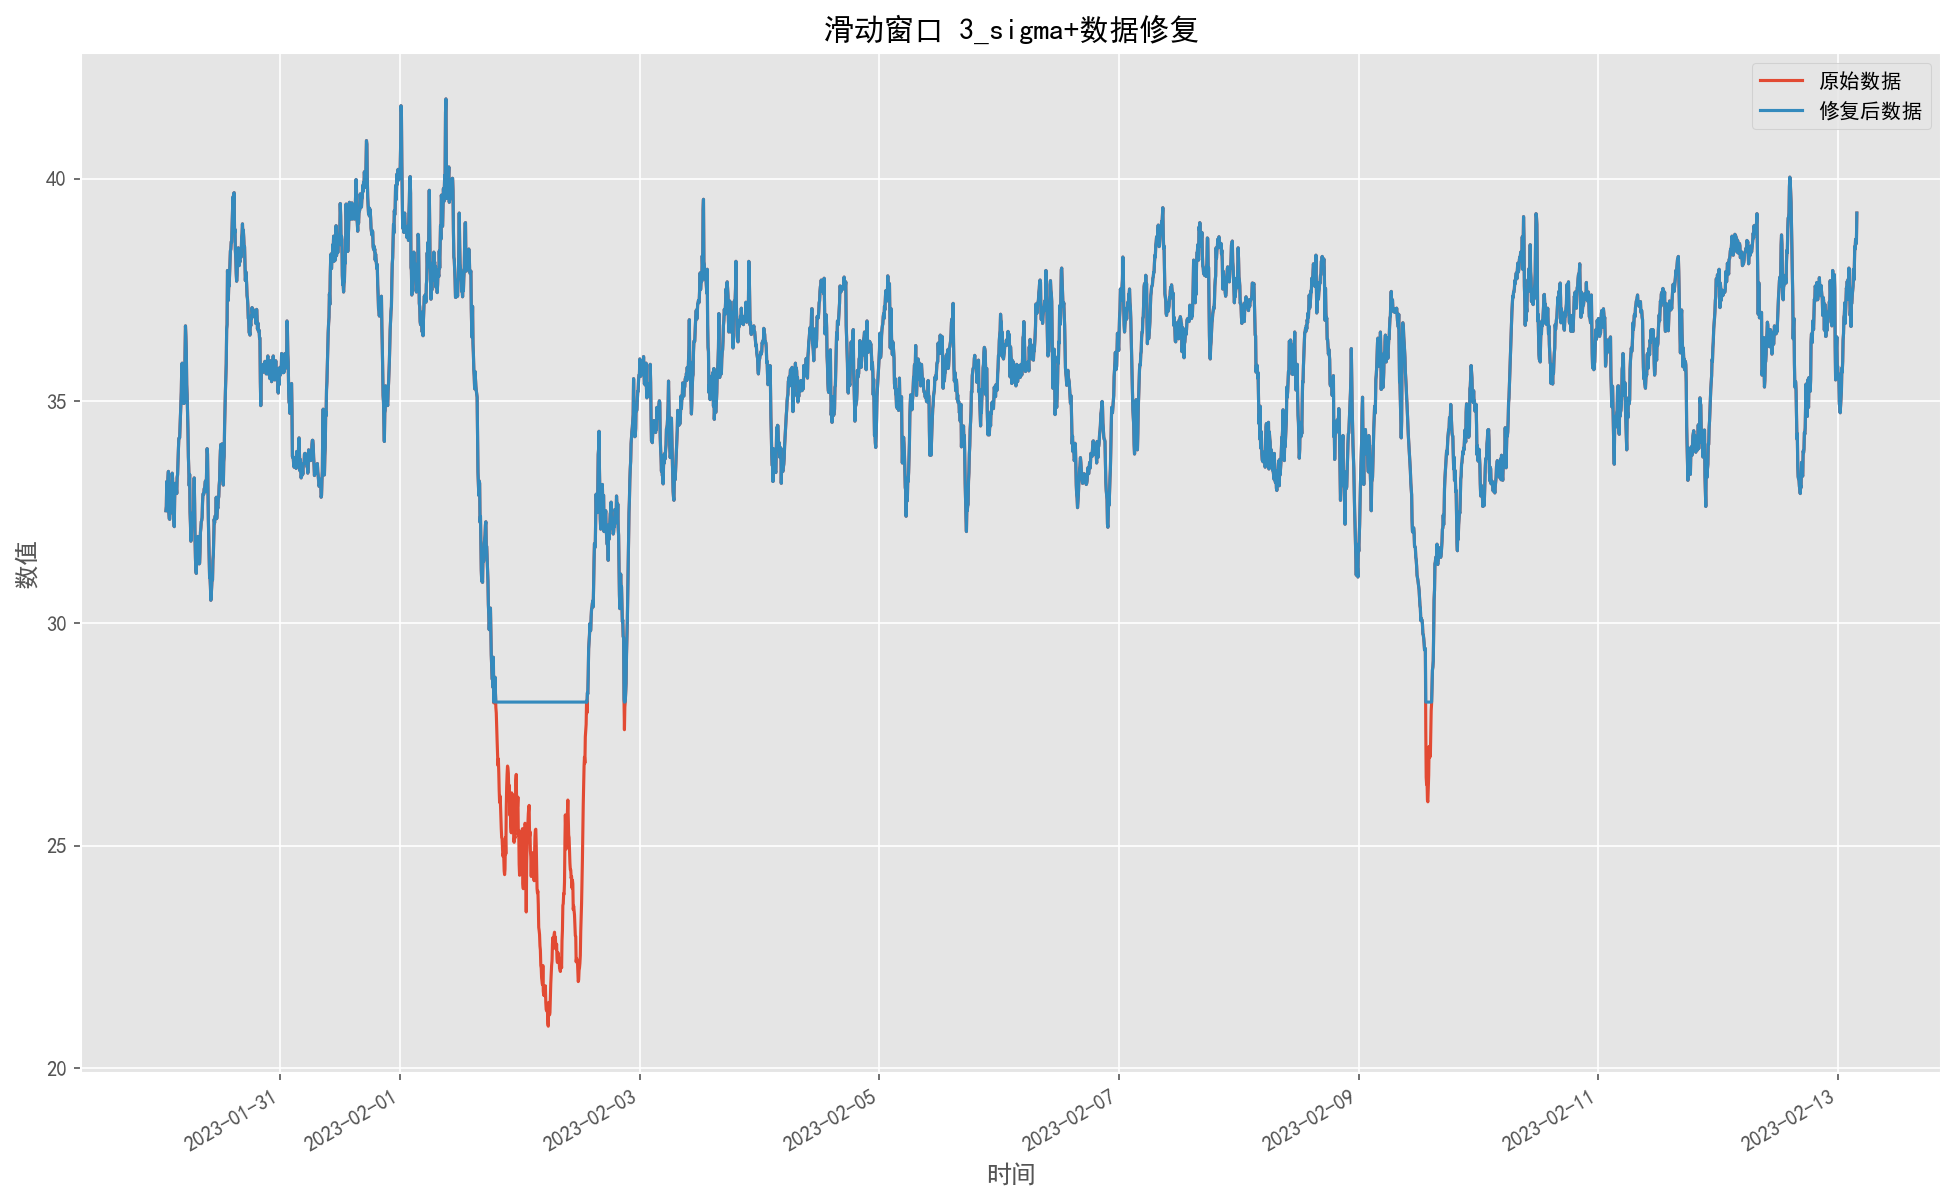

In [171]:
sliding_3_sigma_window_outlier_detection(len(GroupTemperture),3,GroupTemperture,GroupTS)

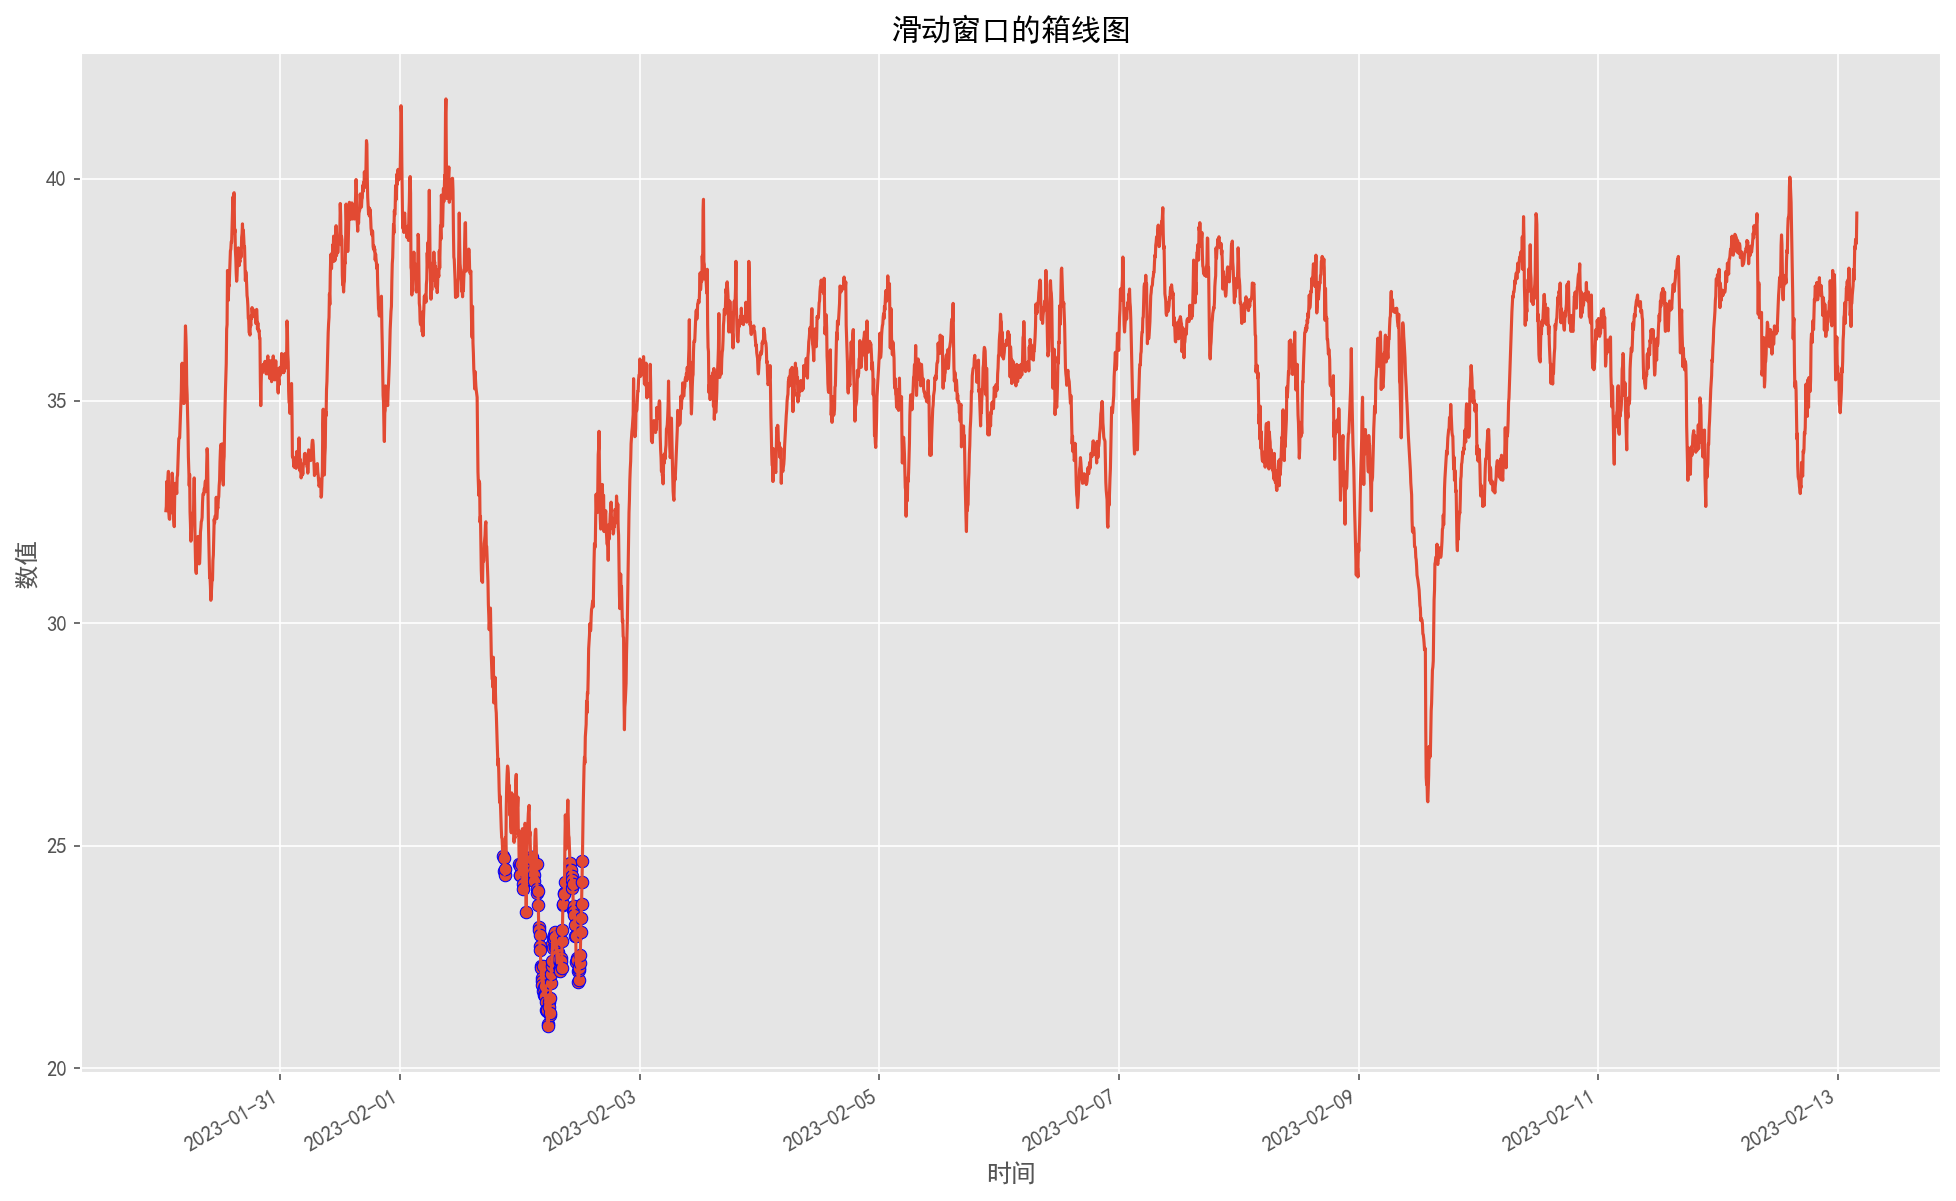

(810    2023-02-01 20:34:37
 812    2023-02-01 20:44:36
 813    2023-02-01 20:49:36
 814    2023-02-01 20:54:37
 815    2023-02-01 20:59:37
                ...        
 997    2023-02-02 12:09:41
 998    2023-02-02 12:14:42
 999    2023-02-02 12:19:42
 1000   2023-02-02 12:24:42
 1001   2023-02-02 12:29:42
 Name: ts, Length: 123, dtype: datetime64[ns],
 810     24.760099
 812     24.732613
 813     24.430212
 814     24.347734
 815     24.471430
           ...    
 997     23.066826
 998     23.374722
 999     23.696056
 1000    24.182802
 1001    24.663889
 Name: temperature, Length: 123, dtype: float64)

In [100]:
sliding_boxplot(len(GroupTemperture),3,GroupTemperture,GroupTS)

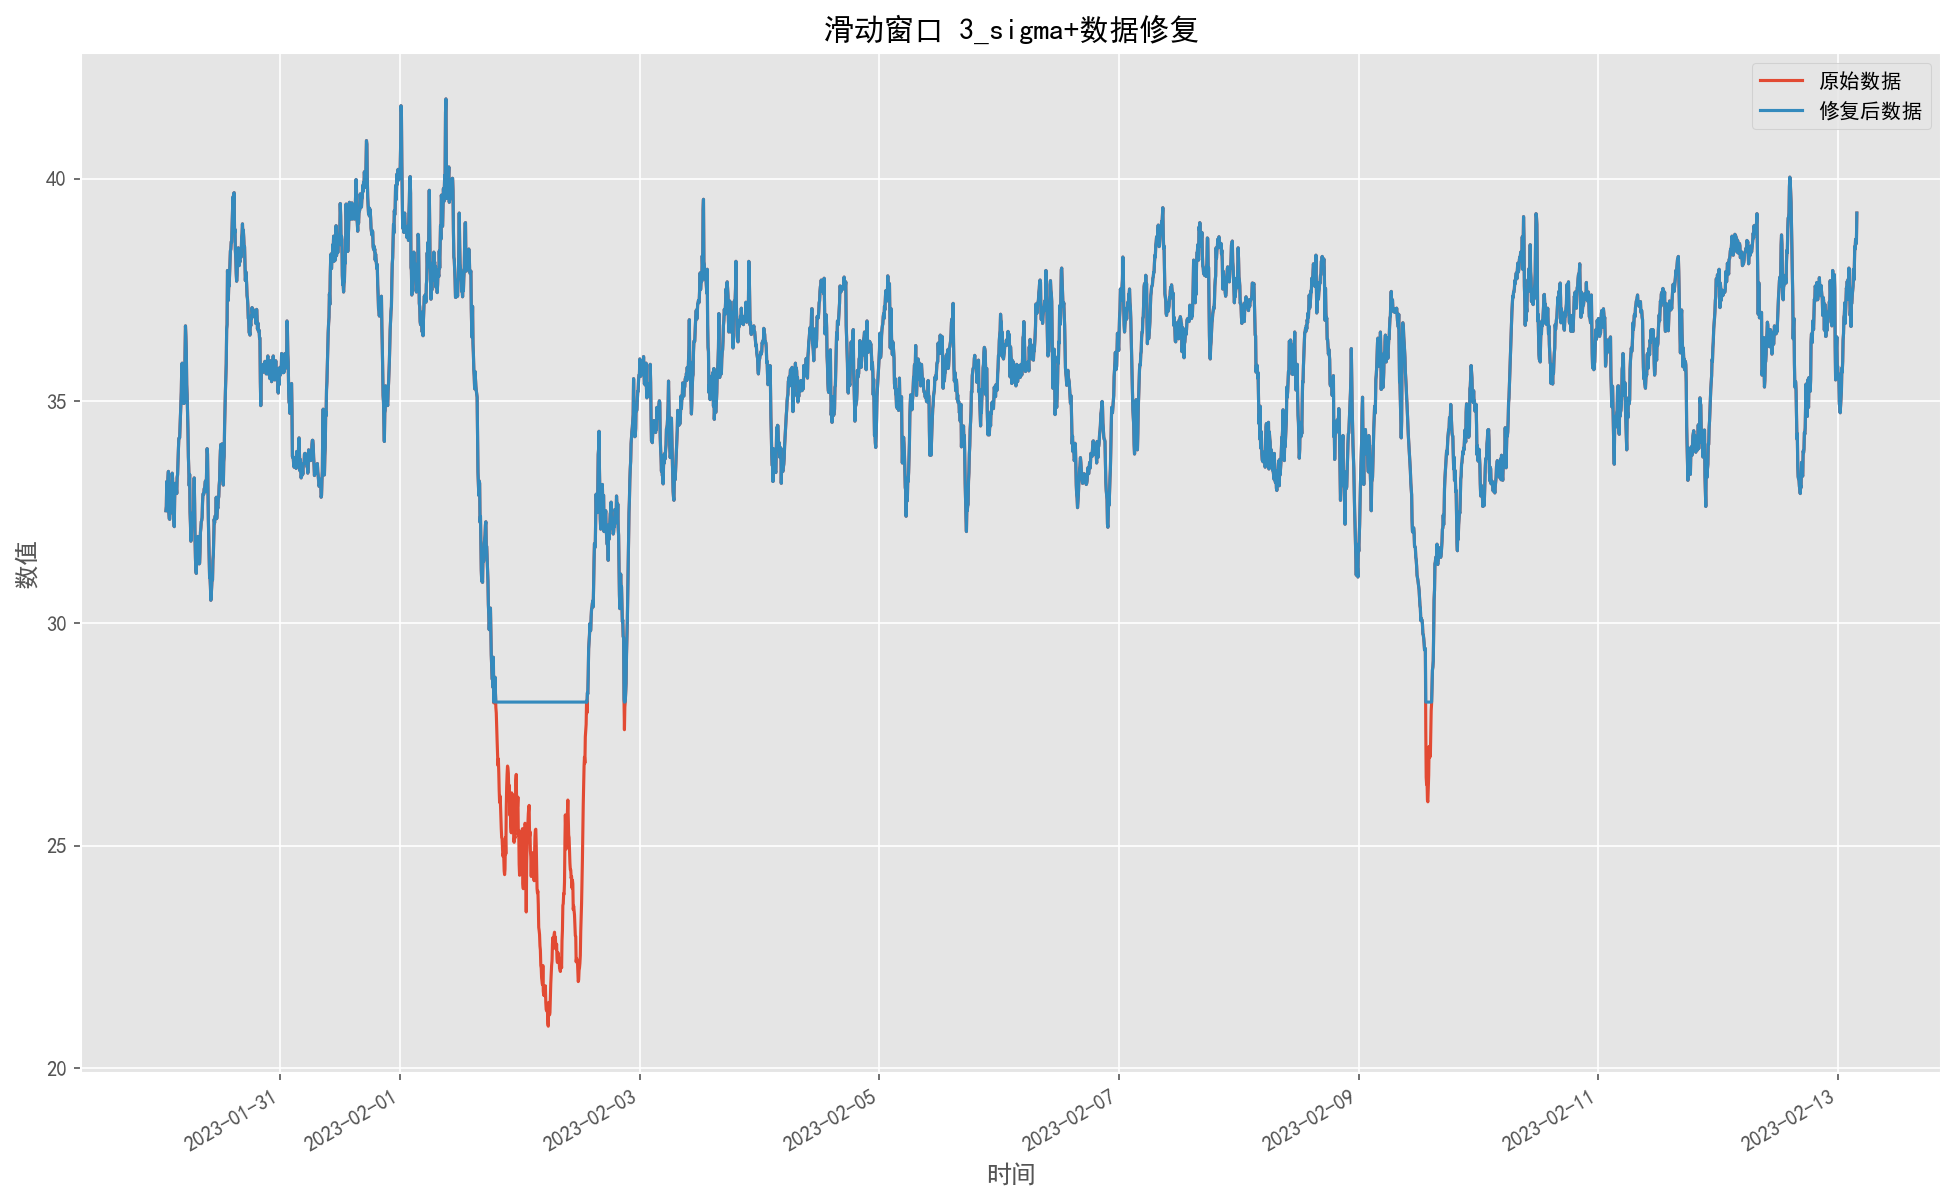

In [135]:
sliding_3_sigma_window_outlier_detection(len(GroupTemperture),3,GroupTemperture,GroupTS)

## test

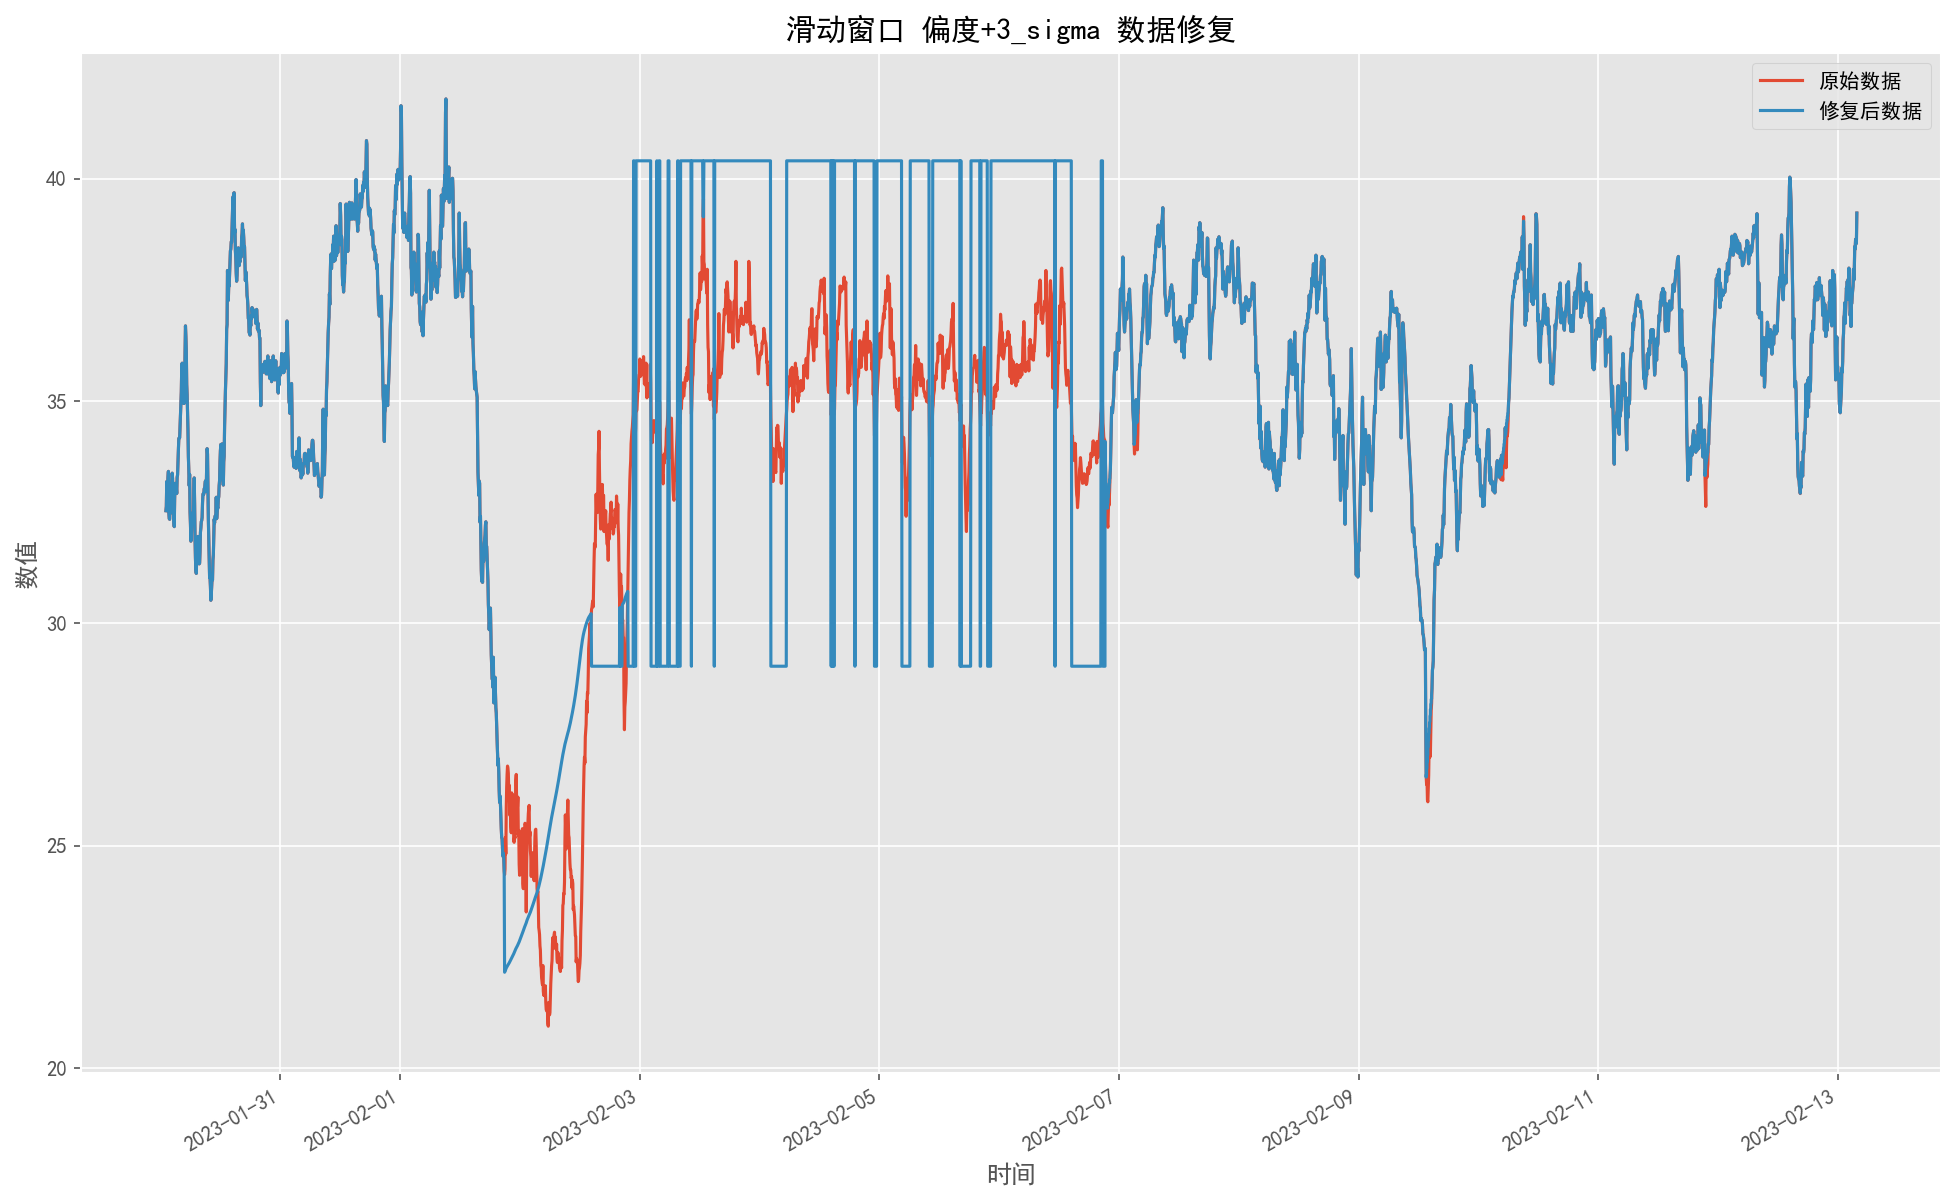

In [172]:
sliding_window_skew_3_sigma_outlier_detection(len(GroupTemperture)//10,3,GroupTemperture,GroupTS)

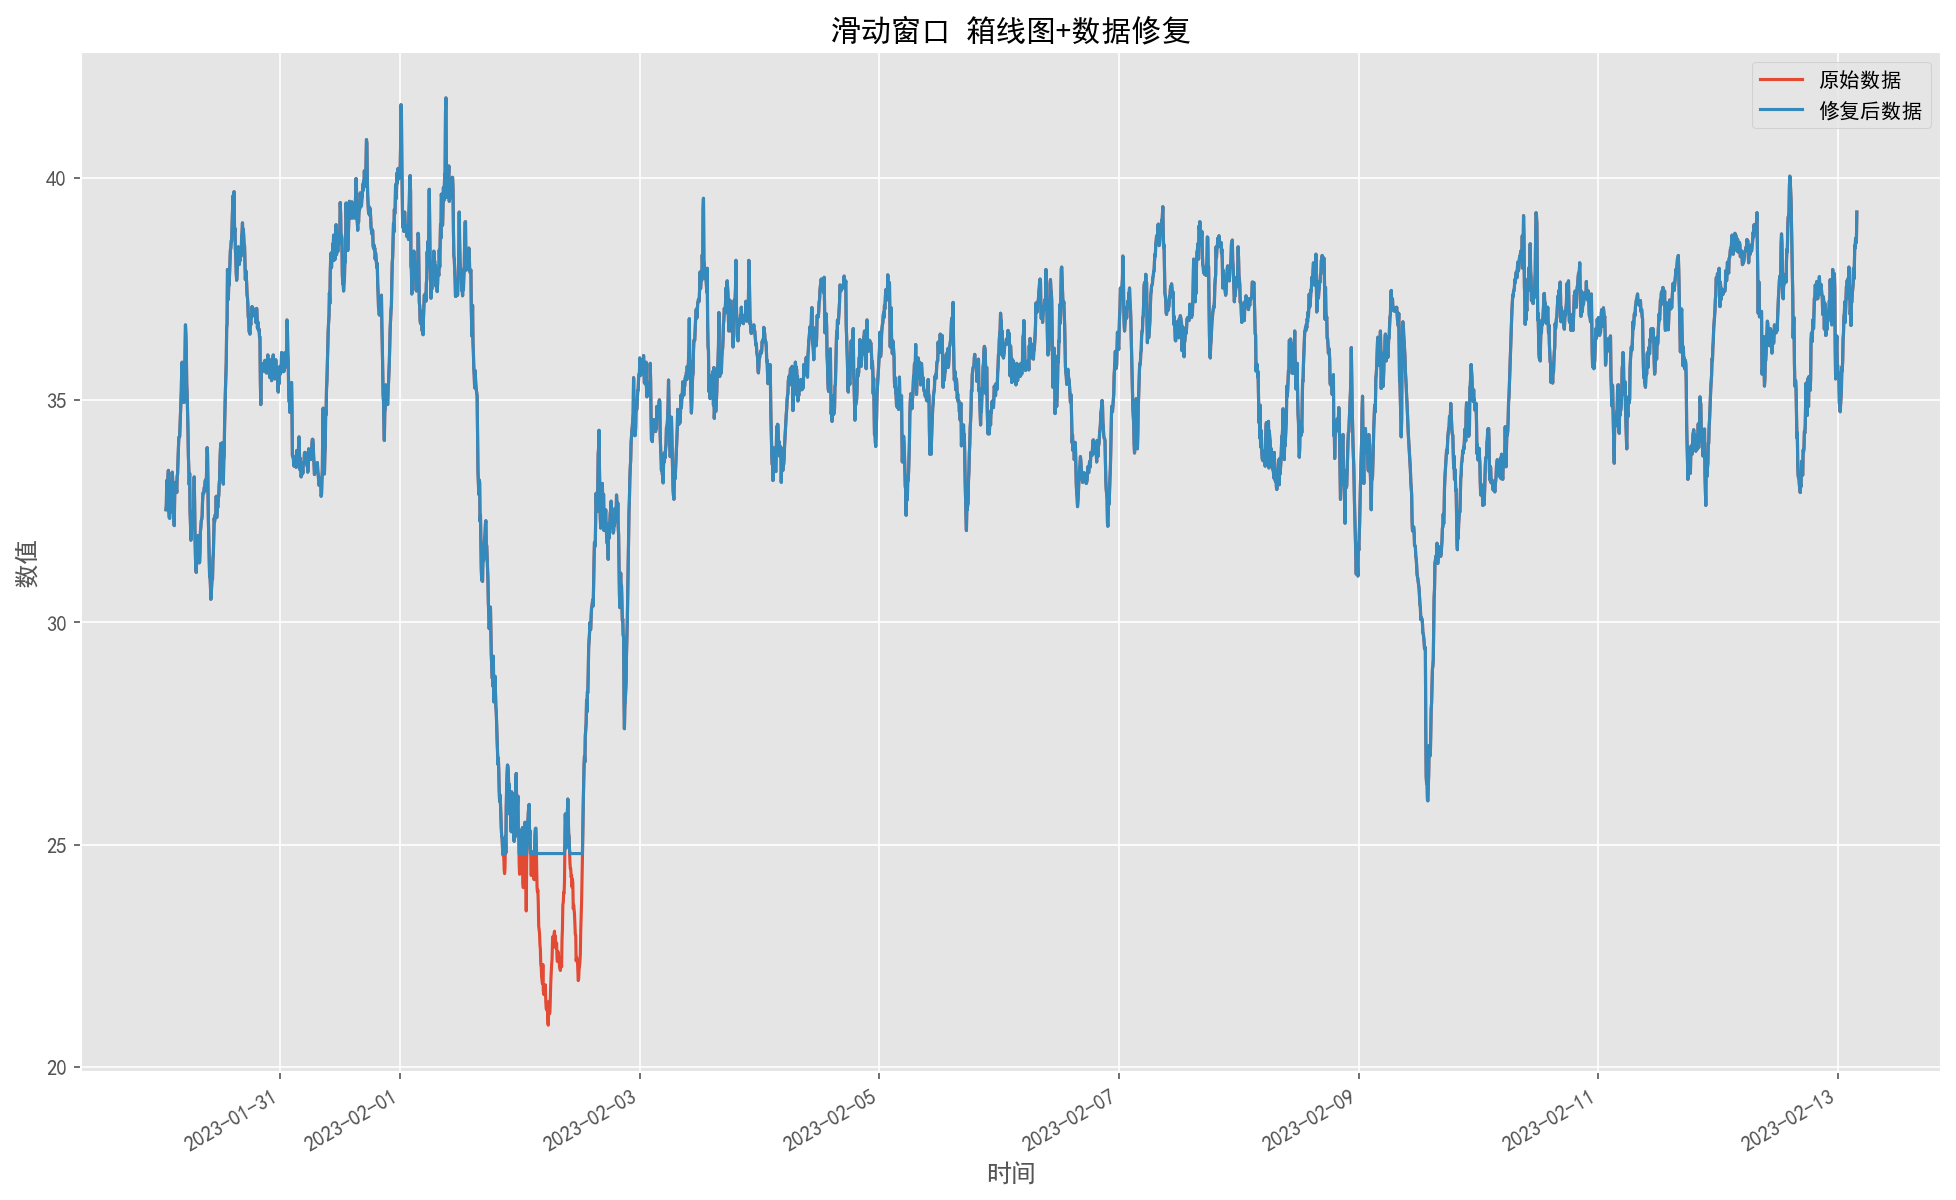

In [173]:
sliding_boxplot_window_outlier_detection(len(GroupTemperture),3,GroupTemperture,GroupTS)

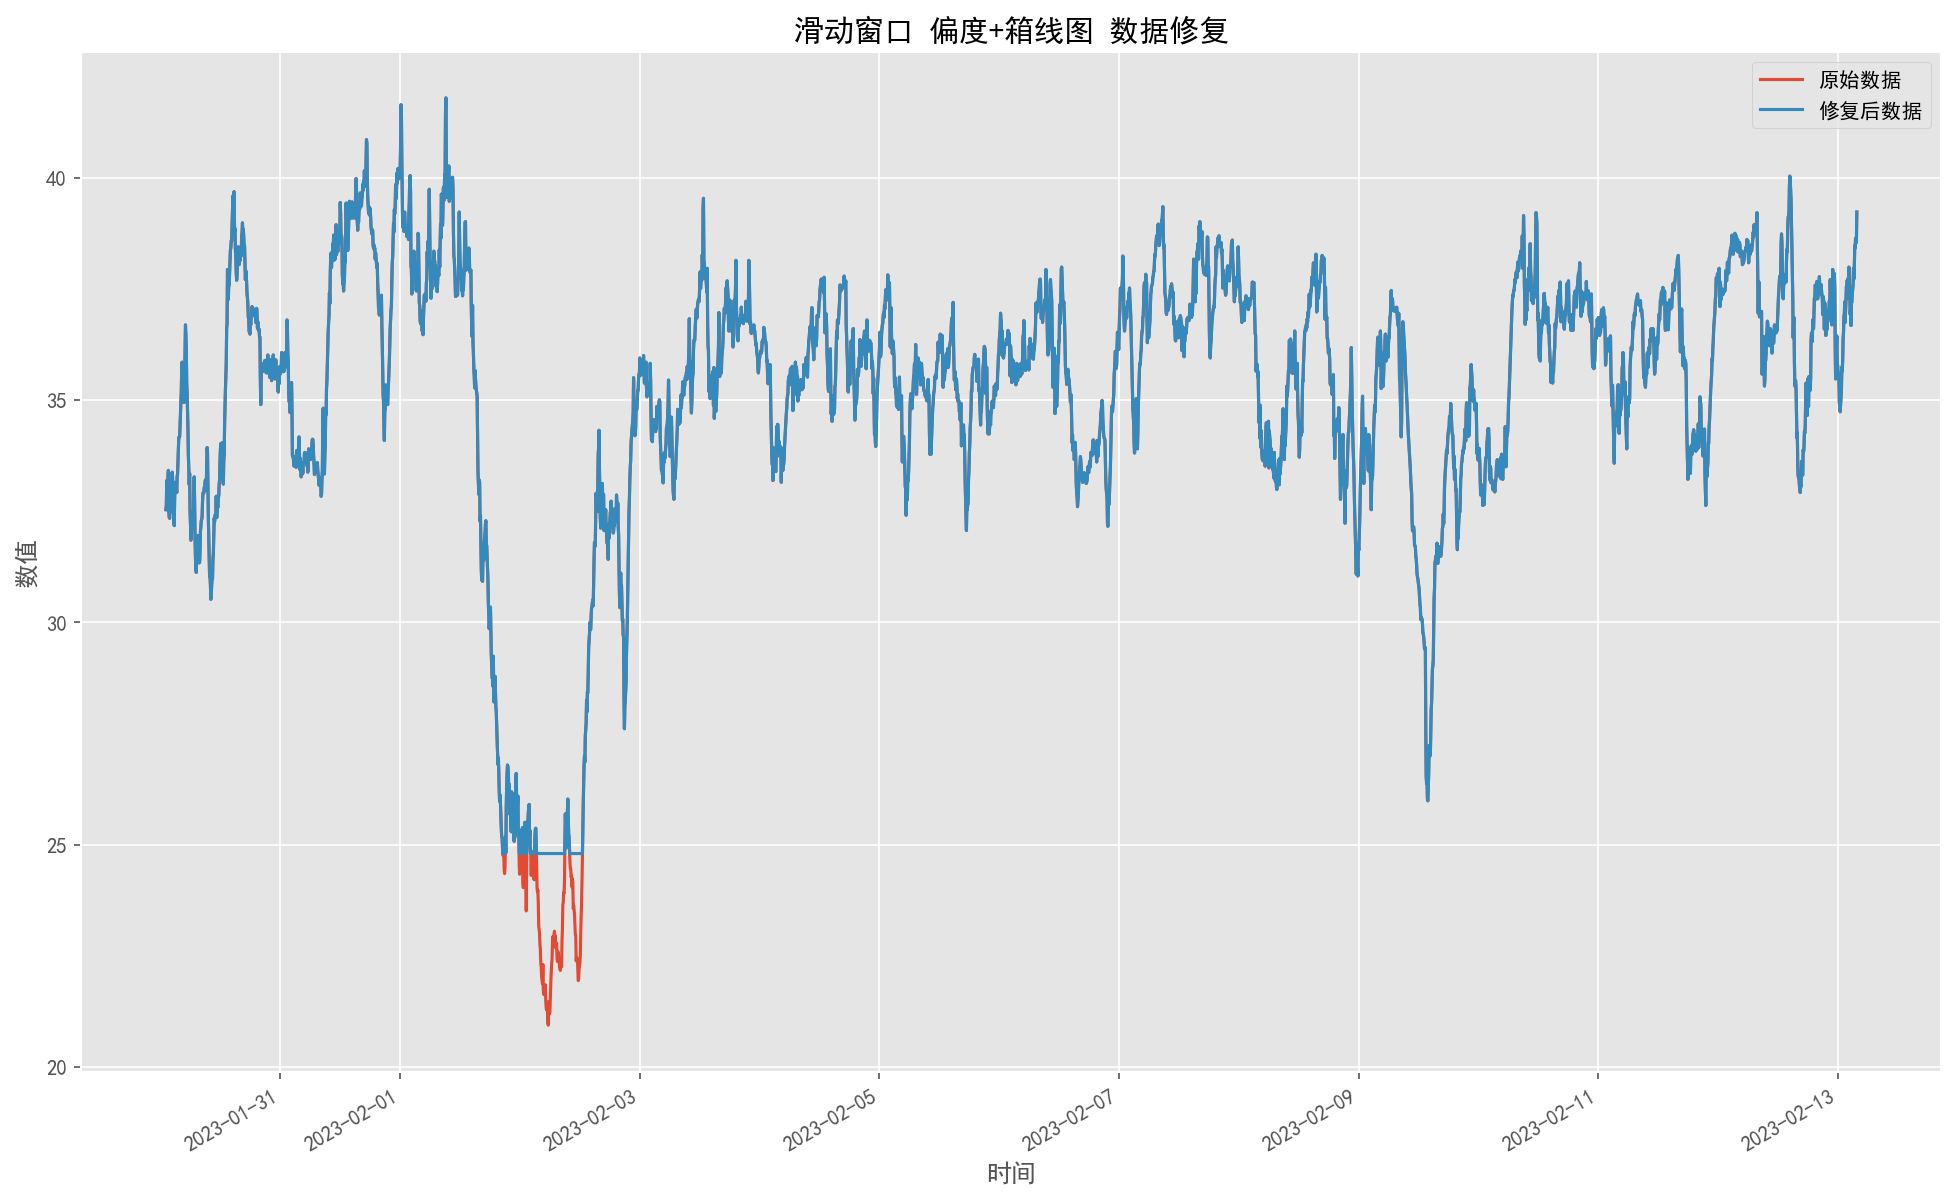

In [141]:
sliding_window_skew_boxplot_outlier_detection(len(GroupTemperture),3,GroupTemperture,GroupTS)

# 所有测点的阈值

,id,dev_no,dev_name,point_no,unit_no,ts,temperature,acceleration_peak_x,acceleration_peak_y,acceleration_peak_z,acceleration_rms_x,acceleration_rms_y,acceleration_rms_z,speed_peak_x,speed_peak_y,speed_peak_z,speed_rms_x,speed_rms_y,speed_rms_z,envelop_energy
804,7675120,452235E01,SPM支撑辊1#电机,c9bbcffeff8d79e0-S,C208,2023-01-30 01:00:00,20.6875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,7675121,452235E01,SPM支撑辊1#电机,c9bbcffeff8d79e0-Z,C208,2023-01-30 01:00:00,NaN,273.000000,95.400002,48.049999,84.729996,24.969999,16.719999,7.840000,9.33,5.58,2.680000,3.4700,2.3100,20.15
806,7675122,450129E02,2#活套2#电机,fe1fe4feff8d79e0-S,C102,2023-01-30 01:00:02,6.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,7675123,450129E02,2#活套2#电机,fe1fe4feff8d79e0-Z,C102,2023-01-30 01:00:02,NaN,9.820000,9.780000,3.140000,3.530000,3.780000,0.663600,3.330000,2.36,1.72,1.416300,0.8485,0.6606,9.78
808,7675124,451223E01,拉矫机主传动电机,5bf8d6feff8d79e0-S,C117,2023-01-30 01:00:03,9.8125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,17674311,450210E01,3#机架主传动电机,50294D205171032,C102,2023-02-13 03:51:04,NaN,8.174423,NaN,NaN,0.606266,NaN,NaN,5.548491,NaN,NaN,2.218695,NaN,NaN,NaN
9999996,17674312,450210E01,3#机架主传动电机,50294D205171033,C102,2023-02-13 03:51:04,NaN,7.044190,NaN,NaN,0.593633,NaN,NaN,2.732698,NaN,NaN,0.857606,NaN,NaN,NaN
9999997,17674313,450210E01,3#机架主传动电机,50294D205171034,C102,2023-02-13 03:51:04,NaN,8.844166,NaN,NaN,0.615582,NaN,NaN,3.589953,NaN,NaN,1.093219,NaN,NaN,NaN
9999998,17674314,450209M13,2机架大齿轮箱,50294D205171011,C102,2023-02-13 03:51:04,NaN,9.195675,NaN,NaN,0.700421,NaN,NaN,6.898361,NaN,NaN,2.700441,NaN,NaN,NaN


In [93]:
# num 的有X
# num_S temp
# num_Z XYZ